In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

# Construindo o modelo

In [4]:
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7, activation='softmax')(x)

# criando o modelo
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [5]:
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

# Preparando os dados usando data generator

In [6]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/BRAIN/Expression_recog/datasets/train",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               )

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [8]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/BRAIN/Expression_recog/datasets/train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# Visualizando os dados gerados pelo train_datagen

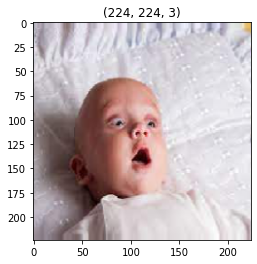

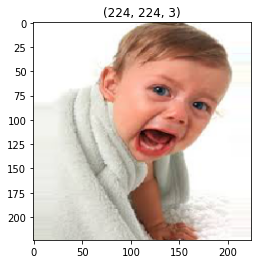

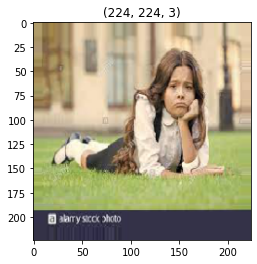

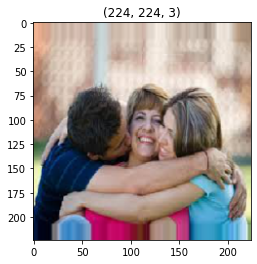

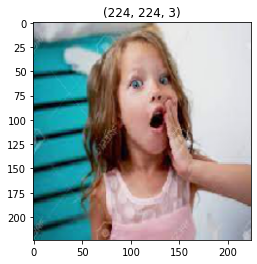

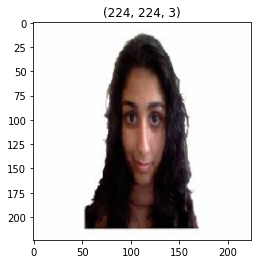

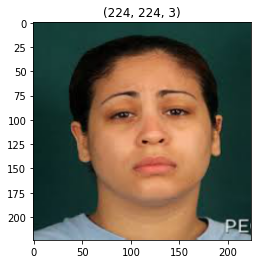

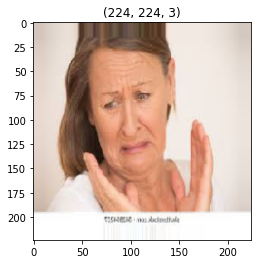

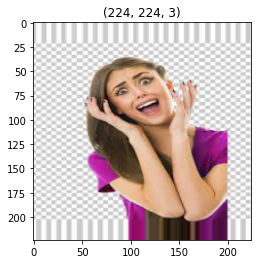

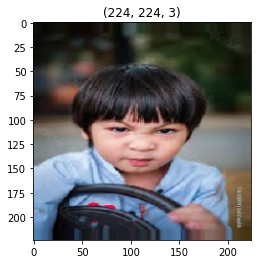

In [9]:
t_img, label = train_data.next()

def plotImages(img_arr, label):
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis=False
        plt.show()

        count += 1
        if count == 10:
            break

plotImages(t_img, label)

# Early stopping e model checkpoint

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# model checkpoint
mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

call_back = [es, mc]

In [11]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=8,
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 10.3629 - accuracy: 0.2075
Epoch 1: val_accuracy improved from -inf to 0.49219, saving model to best_model.h5
10/10 [==============================] - 94s 8s/step - loss: 10.3629 - accuracy: 0.2075 - val_loss: 5.9473 - val_accuracy: 0.4922
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 4.4887 - accuracy: 0.5849
Epoch 2: val_accuracy improved from 0.49219 to 0.63672, saving model to best_model.h5
10/10 [==============================] - 6s 570ms/step - loss: 4.4887 - accuracy: 0.5849 - val_loss: 2.5569 - val_accuracy: 0.6367
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.9049 - accuracy: 0.7075
Epoch 3: val_accuracy improved from 0.63672 to 0.75781, saving model to best_model.h5
10/10 [==============================] - 5s 536ms/step - loss: 1.9049 - accuracy: 0.7075 - val_loss: 1.4471 - val_accuracy: 0.7578
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.

In [12]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [13]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

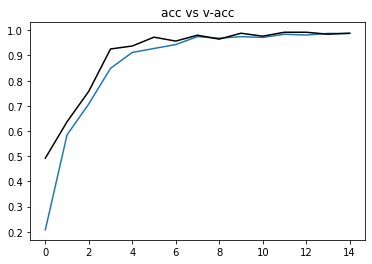

In [16]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='black')
plt.title("acc vs v-acc")
plt.show()

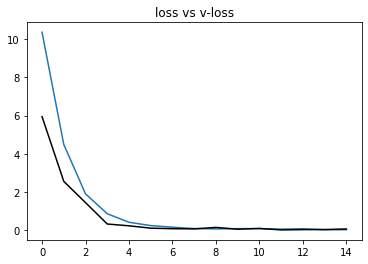

In [17]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='black')
plt.title("loss vs v-loss")
plt.show()

In [19]:
op = dict(zip(train_data.class_indices.values(),train_data.class_indices.keys()))

# Testando

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


A imagem é Fear


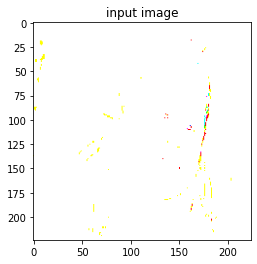

In [23]:
path = '/content/drive/MyDrive/BRAIN/Expression_recog/datasets/train/Happy/download (11).jpg'
img = load_img(path, target_size=(224, 224))

i = img_to_array(img)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f"A imagem é {op[pred]}")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()